In [1]:
!pip install d2l==1.0.0-alpha1.post0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 569 kB/s 
     |████████████████████████████████| 121 kB 50.3 MB/s 
     |████████████████████████████████| 1.6 MB 50.3 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 


# Original

In [24]:
import tensorflow as tf
from d2l import tensorflow as d2l


class Residual(tf.keras.Model):
    """The Residual block of ResNet."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(num_channels, padding='same',
                                            kernel_size=3, strides=strides)
        self.conv2 = tf.keras.layers.Conv2D(num_channels, kernel_size=3,
                                            padding='same')
        self.conv3 = None
        if use_1x1conv:
            self.conv3 = tf.keras.layers.Conv2D(num_channels, kernel_size=1,
                                                strides=strides)
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()

    def call(self, X):
        Y = tf.keras.activations.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3 is not None:
            X = self.conv3(X)
        Y += X
        return tf.keras.activations.relu(Y)

In [25]:
class ResNet(d2l.Classifier):
    def b1(self):
        return tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, kernel_size=7, strides=2,
                                   padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2,
                                      padding='same')])

In [26]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = tf.keras.models.Sequential()
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.add(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.add(Residual(num_channels))
    return blk

In [27]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = tf.keras.models.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add(self.block(*b, first_block=(i==0)))
    self.net.add(tf.keras.models.Sequential([
        tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(units=num_classes)]))

In [28]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

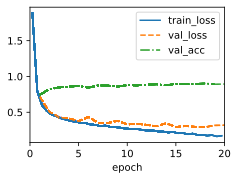

In [36]:
trainer = d2l.Trainer(max_epochs=20)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
with d2l.try_gpu():
    model = ResNet18(lr=0.01)
    trainer.fit(model, data)

# Arquitetura alterada

In [30]:
import tensorflow as tf
from d2l import tensorflow as d2l


class Residual(tf.keras.Model):
    """The Residual block of ResNet."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(num_channels, padding='same',
                                            kernel_size=3, strides=strides)
        self.conv2 = tf.keras.layers.Conv2D(num_channels, kernel_size=3,
                                            padding='same')
        self.conv3 = None
        if use_1x1conv:
            self.conv3 = tf.keras.layers.Conv2D(num_channels, kernel_size=1,
                                                strides=strides)
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()

    def call(self, X):
        Y = tf.keras.activations.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3 is not None:
            X = self.conv3(X)
        Y += X
        return tf.keras.activations.relu(Y)

In [31]:
class ResNet(d2l.Classifier):
    def b1(self):
        return tf.keras.models.Sequential([
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.Conv2D(64, kernel_size=7, strides=2,
                                   padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2,
                                      padding='same')])

In [32]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = tf.keras.models.Sequential()
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.add(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.add(Residual(num_channels))
    return blk

In [33]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = tf.keras.models.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add(self.block(*b, first_block=(i==0)))
    self.net.add(tf.keras.models.Sequential([
        tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(units=num_classes)]))

In [34]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

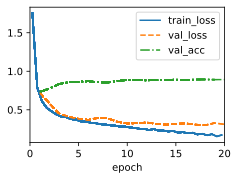

In [37]:
trainer = d2l.Trainer(max_epochs=20)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
with d2l.try_gpu():
    model = ResNet18(lr=0.01)
    trainer.fit(model, data)